In [ ]:
 # Подгрузим пакеты 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [ ]:
# загружаем файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
df = pd.read_csv('HR.csv')

Признак в HR.csv:

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_project - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - название отдела, в котором работает сотрудник
10. salary - относительный уровень зарплаты (low, medium, hight )


**Изучим основным статистики для переменных датафрейма**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Найдем выбросы через межквартльный размах (на примере Уровеня удовлетворенности работой)

In [ ]:
q1 = df['satisfaction_level'].quantile(0.25)
q3 = df['satisfaction_level'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) # фиксируем границы интервалов
upper_bound = q3 + (1.5 * iqr) # фиксируем границы интервалов
remove_outliers = df[df['satisfaction_level'].between(lower_bound, upper_bound, inclusive=True)] # выделили интерсвал, который сюда попадает; inclusive=Truе - границы берутся включительно
remove_outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# что это за выбросы?
df[~df['satisfaction_level'].between(lower_bound, upper_bound, inclusive=True)]
# выбросов нет,  данные нормализованы

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


In [ ]:
# посмотрим есть ли пропуски
## получаем процент пропусков в каждом столбце
(df.isna().mean() * 100).round(2)

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
department               0.0
salary                   0.0
dtype: float64

Вывод: пропусков и выбросов нет в датасете . Значит дальше начинаем изучать данные в датасете.

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# посчитаем моду
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


 **Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.**

In [ ]:
# можем посчитать коэффициенты корреляции между всеми показателями
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


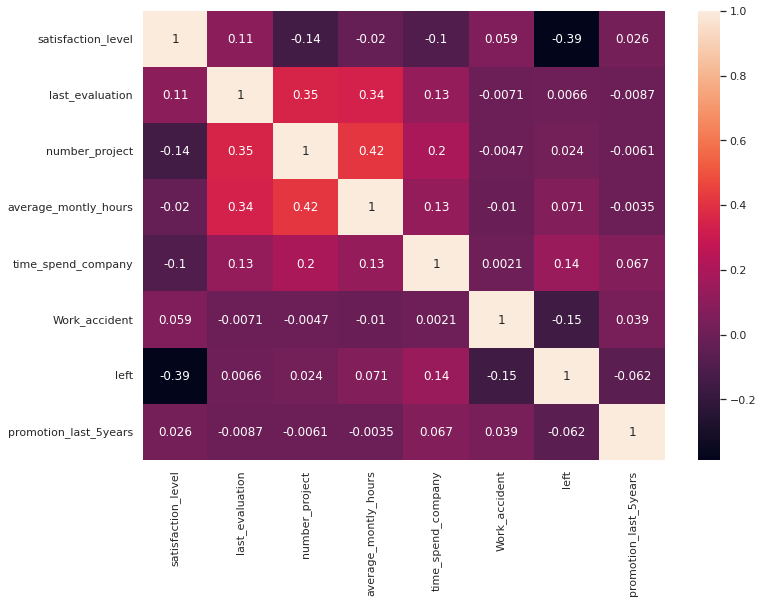

In [ ]:
# удобно визуализировать при помощи тепловой карты
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), annot=True)

Выводы: 
- наиболее скоррелированные переменные: number_projects (Количество проектов, выполненных за время работ) и average_monthly_hours (Среднее количество часов на рабочем месте в месяц); number_projects (Количество проектов, выполненных за время работ) и Last_evaluation (Время с момента последней оценки в годах).
- наименее скоррелированные переменные: left (уволился ли сотрудник) и satisfaction_level (Уровень удовлетворенности работой); left и Work_accident (Происходили ли несчастные случаи на рабочем месте с сотрудником).

 **Рассчитайте сколько сотрудников работает в каждом
департаменте.**


In [ ]:
# изучим какие департаменты представлены
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
df_department_count = df.department.value_counts().reset_index()
# рассчет доли 
df_department_count['share'] = df_department_count.department / df_department_count.department.sum() 
df_department_count

,index,department,share
0,sales,4140,0.276018
1,technical,2720,0.181345
2,support,2229,0.148610
3,IT,1227,0.081805
4,product_mng,902,0.060137
5,marketing,858,0.057204
6,RandD,787,0.052470
7,accounting,767,0.051137
8,hr,739,0.049270
9,management,630,0.042003


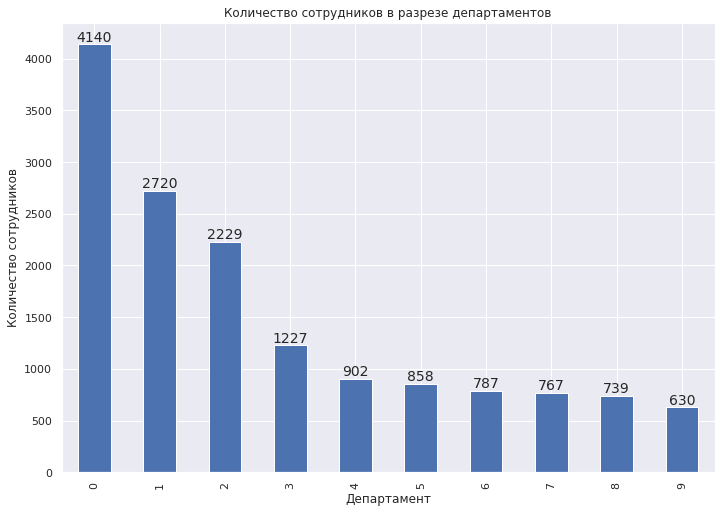

In [ ]:
# построим столбчатую диаграмму - количество сотрудников  в разрезе департаментов
df_department_count.department.plot(kind='bar', title='Количество сотрудников в разрезе департаментов',
                             xlabel='Департамент',
                             ylabel='Количество сотрудников')
# подписываем данные
for i, val in enumerate(df_department_count.department.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

Вывод: 
Представлено 10 департаментов.
Самое большое количесто специалистов это в отделе sales, минимальное - в management

**Показать распределение сотрудников по зарплатам.** 

In [ ]:
# изучим какие уровни зарплаты представлены
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
df_salary_group = df.salary.value_counts().reset_index()
# рассчет доли 
df_salary_group['share'] = df_salary_group.salary / df_salary_group.salary.sum() 
df_salary_group

,index,salary,share
0,low,7316,0.487766
1,medium,6446,0.429762
2,high,1237,0.082472


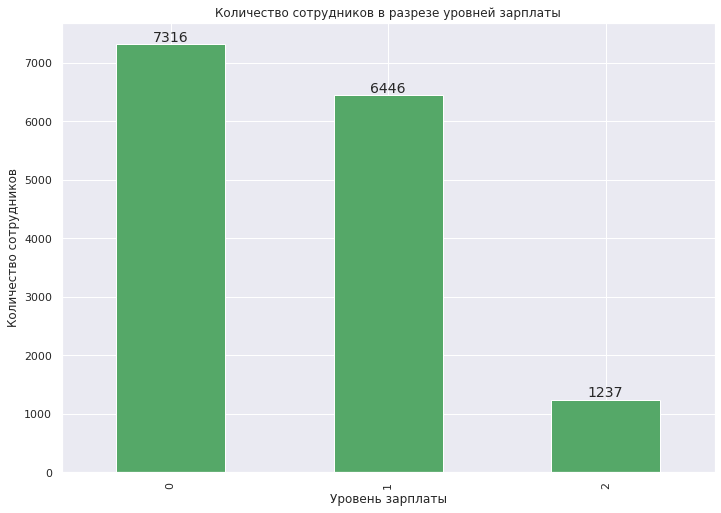

In [ ]:
# построим столбчатую диаграмму -  количество в разрезе зарплат
df_salary_group.salary.plot(kind='bar', title='Количество сотрудников в разрезе уровней зарплаты',
                             xlabel='Уровень зарплаты',
                             ylabel='Количество сотрудников',
                            color = 'g'
                     )
# подписываем данные
for i, val in enumerate(df_salary_group.salary.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})


Вывод: 
Представлено 3 уровня заработной платы.
Самое большое количесто специалистов получает зарплаты уровня low.

**Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности**

In [ ]:
# группировка по паре столбцов
df_department_salary = df.groupby(['department','salary']).department.count()
df_department_salary

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: department, dtype: int64

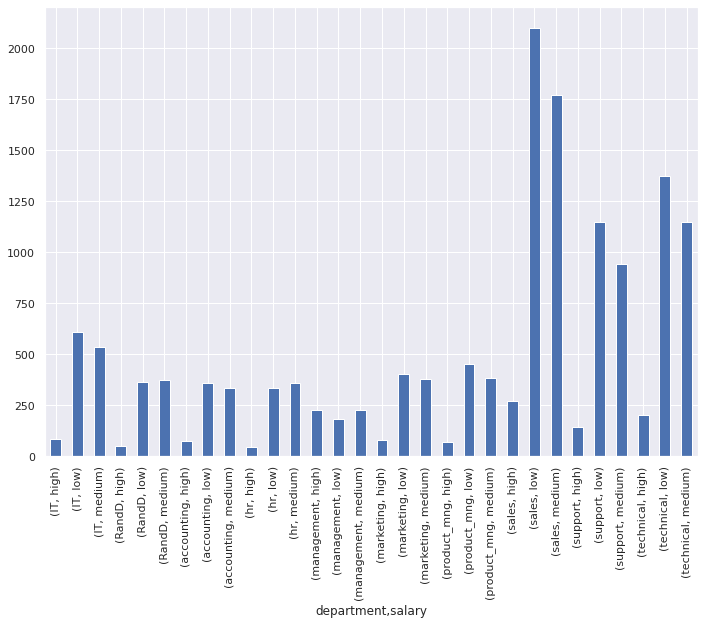

In [ ]:
# построим столбчатую диаграмму 
df_department_salary.plot(kind='bar', stacked=True)

**Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом**

In [ ]:
# Сохраним в отдельные  выборки, которые собираемся сравнивать.
df_high_salary = df[df.salary == 'high']
df_low_salary = df[df.salary == 'low']
df_high_salary.name, df_low_salary.name = 'high_salary', 'low_salary'

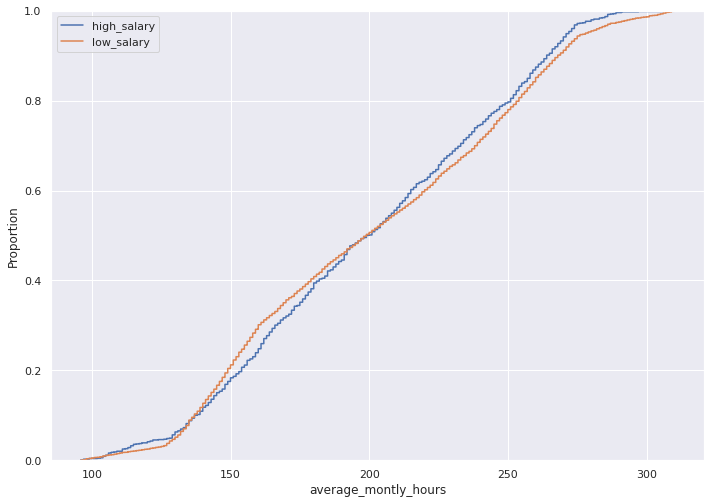

In [ ]:
# построим графики для выборок на основе поля average_montly_hours, чтобы изучить данные
fig, ax = plt.subplots()
sns.ecdfplot(x=df_high_salary['average_montly_hours'], ax=ax, label = df_high_salary.name)
sns.ecdfplot(x=df_low_salary['average_montly_hours'], ax=ax, label = df_low_salary.name)
ax.legend()

In [ ]:
print(df_high_salary['average_montly_hours'].mean(), df_low_salary['average_montly_hours'].mean())
print(f"отклонение = {1-df_high_salary['average_montly_hours'].mean()/ df_low_salary['average_montly_hours'].mean():.2%}")

199.86742118027485 200.9965828321487
отклонение = 0.56%


In [ ]:
# Проверяем нормальность распределений.
# Создадим простую функцию для визуализации распределения пары выборок.
def two_histograms(x, y):
    # После определения функции полезно бывает добавить её описание в таком стиле.
    # Тройные кавычки -- для обрамления многострочных строковых литералов.
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    # alpha - прозрачность, weights - позволяет задать веса, по которым мы строим гистограмму.
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))  
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

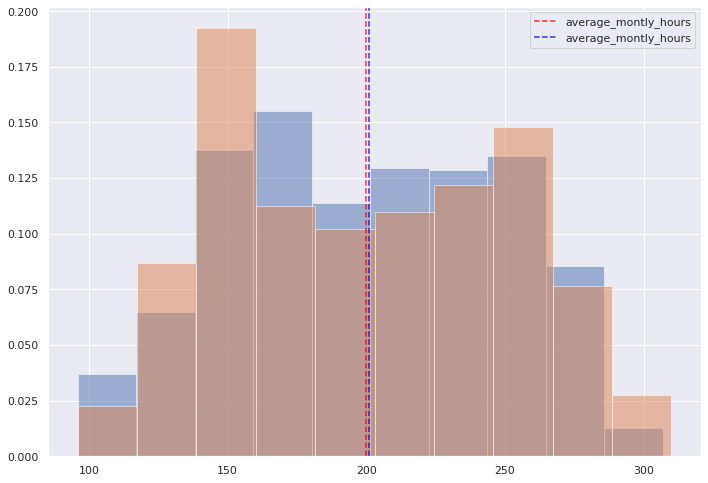

In [ ]:
# вызываем функцию для определённых выше векторов x, y.
two_histograms (df_high_salary['average_montly_hours'], df_low_salary['average_montly_hours'])

H0: сотрудники с высокой зарплатой на работе проводят столько же времени как и сотрудники с низкой зарплатой.

H1: сотрудники с высокой зарплатой и сотрудникой с низкой зарплатой проводят на работе разное время.

Существует мнение, что использование критерия Уэлча всегда предпочтительнее, будем придерживаться этой позиции.

Здесь нам уже нужен двухвыборочный двухсторонний критерий.

In [ ]:
alpha = 0.05
result = st.ttest_ind(df_high_salary['average_montly_hours'], df_low_salary['average_montly_hours'], equal_var=False)
print(result)
print(df_high_salary['average_montly_hours'].mean())
print(df_low_salary['average_montly_hours'].mean())
print(result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, сотрудники с высокой зарплатой и сотрудникой с низкой зарплатой проводят на работе разное время.')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
199.86742118027485
200.9965828321487
0.4459045542257889
Не отвергаем нулевую гипотезу


Вывод: 
средние значения у данных выборок почти совпадают, отклонение = 0.56%. И нулевую гипотезу, что в среднем работают одинковое количество часов, на данной выборке не отвегаем. 
На графике мы видим, что данные почти совпадают.

 **Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):**
 

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [ ]:
# Сохраним в отдельные  выборки, которые собираемся сравнивать.
df_left_1 = df[df.left == 1 ]  # уволившиеся сотрудники , те left == 1
df_left_0 = df[df.left == 0] # неуволившиеся сотрудники , те left == 0
df_left_1.name, df_left_0.name = 'left_1', 'left_0'

In [ ]:
df_left_1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Доля сотрудников с повышением за последние 5 лет
## сормируем из выборок уже выборку сотрудников с повышением за последние 5 лет
df_left_1_promotion_last_5years  =  df_left_1.loc[df_left_1.promotion_last_5years == 1]
df_left_0_promotion_last_5years  =  df_left_0.loc[df_left_0.promotion_last_5years == 1]

print(f'Доля сотрудников с повышением за последние 5 лет среди уволившихся = {df_left_1_promotion_last_5years.salary.count() / df_left_1.salary.count():.2%}')
print(f'Доля сотрудников с повышением за последние 5 лет среди не уволившихся = {df_left_0_promotion_last_5years.salary.count() / df_left_0.salary.count():.2%}')

Доля сотрудников с повышением за последние 5 лет среди уволившихся = 0.53%
Доля сотрудников с повышением за последние 5 лет среди не уволившихся = 2.63%


In [ ]:
# Рассчитаем Среднюю степень удовлетворенности по выборкам уволившихся и не уволившихся
print(f"средняя уровень удовлетворенности работой = {df_left_1.satisfaction_level.mean():.2}, {df_left_0.satisfaction_level.mean():.2}")
print(f"отклонение = {1-df_left_1.satisfaction_level.mean()/ df_left_0.satisfaction_level.mean():.2%}")

средняя уровень удовлетворенности работой = 0.44, 0.67
отклонение = 34.00%


In [ ]:
# Среднее количество проектов number_projects среди уволившихся и не уволившихся
print(f"Среднее количество проектов = {df_left_1.number_project.mean():.2}, {df_left_0.number_project.mean():.2}")
print(f"отклонение = {1-df_left_1.number_project.mean()/ df_left_0.number_project.mean():.2%}")

Среднее количество проектов = 3.9, 3.8
отклонение = -1.82%


Вывод: у уволившихся средняя неудовлетворенность ниже среднего значения, у не уволившихся среднее значение удовлетворенность чуть выше среднего. В целом числа не очень вдохновляющие, HR надо обратить внимание на это и надо с этим сработать для повышения удовлеиворености.
Видим, что среднее количество проетов у сотрудников в этих двух выборках почти одинаковое

 **Разделить данные на тестовую и обучающую выборки. 
 
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary).**

**Оценить качество модели на тестовой выборки**

In [ ]:
data_left = pd.array(df['left'])

In [ ]:
# загружаем данные в датафрейм
data = pd.DataFrame(df, columns=['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'time_spend_company', 'Work_accident', 'promotion_last_5years'])

In [ ]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,3,0,0
1,0.80,0.86,5,262,6,6,0,0
2,0.11,0.88,7,272,4,4,0,0
3,0.72,0.87,5,223,5,5,0,0
4,0.37,0.52,2,159,3,3,0,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,3,0,0
14995,0.37,0.48,2,160,3,3,0,0
14996,0.37,0.53,2,143,3,3,0,0
14997,0.11,0.96,6,280,4,4,0,0


In [ ]:
# разделяем выборку на тренировочную и тестовую

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_left, test_size=0.25)

In [ ]:
len(y_test)

3750

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
3745,0,0
3746,0,0
3747,1,0
3748,0,0


In [ ]:
# ОЦЕНКА РЕЗУЛЬТАТА МОДЕЛИ
# Вывод: видим что оценка качества модели достаточно хорошая, так как , чем ближе к 1 тем лучше модель
# если  <0 то модель некачественная или выборка очень маленькая 

from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7642666666666666